In [2]:
%load_ext autoreload
%autoreload 2

from IPython.display import display


import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import numpy.linalg as la
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## One-way Push Model

In [154]:
def one_way_push(x, args):
    (WT, ST, vWS, vWSp, vSp) = args
    
    (W, Su, Sp, WSu, WSp, SuT, SpT) = x
        
    res = np.zeros_like(x)
    
    
    pWSu = vWS*W / (1 + vWS*W)
    
    res[0] = SpT/ST - (vWSp*pWSu + vSp)/ (vWSp*pWSu + vSp + 1)
    res[1] = W/WT - 1/(1+vWS*(Su+Sp))
    res[2] = Su/SuT - 1/(1+vWS*W)
    res[3] = Sp/SpT - 1/(1+vWS*W)
    res[4] = ST - SuT - SpT
    res[5] = SuT - Su - WSu
    res[6] = SpT - Sp - WSp
    
#     print(res)
            
    return res



In [163]:
WT = 10
ST = 10
vWS = 1.0
vSp = 0.1

W0 = 4.0
Su0 = 2.0
Sp0 = 2.0
WSu0 = 3.0
WSp0 = 3.0
SuT0 = 5.0
SpT0 = 5.0

N = 10

x0 = (W0, Su0, Sp0, WSu0, WSp0, SuT0, SpT0)

x = np.zeros([N, len(x0)])

vWSp_list = np.logspace(-3, 3, N)
# print(vWSp_list)
# vWSp_list = [2.15443469e+02]
for i, vWSp in enumerate(vWSp_list):
    
    args = ((WT, ST, vWS, vWSp, vSp),)

    result = opt.root(one_way_push, x0, args=args, method='lm')
    
    x[i] = result.x
    
#     print(result)
    
#     break
    


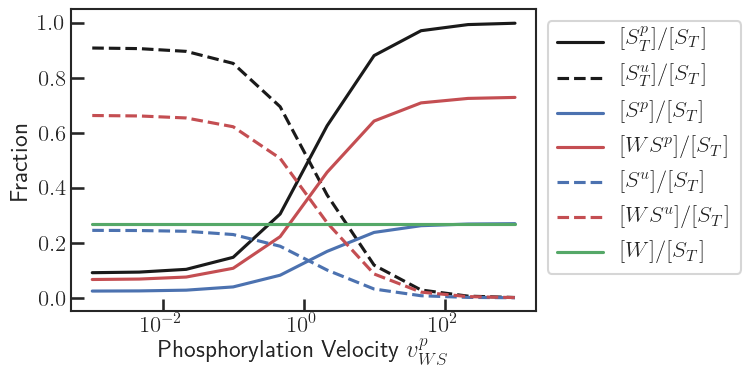

In [164]:
sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':True})


fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.plot(vWSp_list, x[:, 6]/ST, 'k-', label="$[S^p_T]/[S_T]$")
ax.plot(vWSp_list, x[:, 5]/ST, 'k--', label="$[S^u_T]/[S_T]$")

ax.plot(vWSp_list, x[:, 2]/ST, 'b-', label="$[S^p]/[S_T]$")
ax.plot(vWSp_list, x[:, 4]/ST, 'r-', label="$[WS^p]/[S_T]$")

ax.plot(vWSp_list, x[:, 1]/ST, 'b--', label="$[S^u]/[S_T]$")
ax.plot(vWSp_list, x[:, 3]/ST, 'r--', label="$[WS^u]/[S_T]$")

ax.plot(vWSp_list, x[:, 0]/ST, 'g-', label="$[W]/[S_T]$")


ax.set_xscale('log')

ax.set_ylabel("Fraction")
ax.set_xlabel("Phosphorylation Velocity $v_{WS}^p$")


ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

## Goldbeter Model

In [110]:

def Goldbeter_push_pull(x, args):
    (WT, ET, ST, vWS, vES, vWSp) = args
    
    (W, E, Su, Sp, WSu, ESp, SuT, SpT) = x
        
    res = np.zeros_like(x)
    
    
    pWSu = vWS*W / (1 + vWS*W)
    pESp = vES*E / (1 + vES*E)
    
    res[0] = SpT/ST - vWSp*pWSu/ (vWSp*pWSu + pESp)
    res[1] = W/WT - 1/(1+vWS*Su)
    res[2] = E/ET - 1/(1+vES*Sp)
    res[3] = Su/SuT - 1/(1+vWS*W)
    res[4] = Sp/SpT - 1/(1+vES*E)
    res[5] = ST - SuT - SpT
    res[6] = SuT - Su - WSu
    res[7] = SpT - Sp - ESp
    
#     print(res)
            
    return res


In [131]:

WT = 10
ET = 10
ST = 10
vWS = 1.0
vES = 1.0

W0 = 7.0
E0 = 7.0
Su0 = 2.0
Sp0 = 2.0
WSu0 = 3.0
ESp0 = 3.0
SuT0 = 5.0
SpT0 = 5.0

N = 10

x0 = (W0, E0, Su0, Sp0, WSu0, ESp0, SuT0, SpT0)

x = np.zeros([N, len(x0)])

vWSp_list = np.logspace(-3, 3, N)
for i, vWSp in enumerate(vWSp_list):
    
    args = ((WT, ET, ST, vWS, vES, vWSp),)
    
    result = opt.root(Goldbeter_push_pull, x0, args=args, method='lm')
    
    x[i] = result.x
    
#     print(result)
    
#     break
    


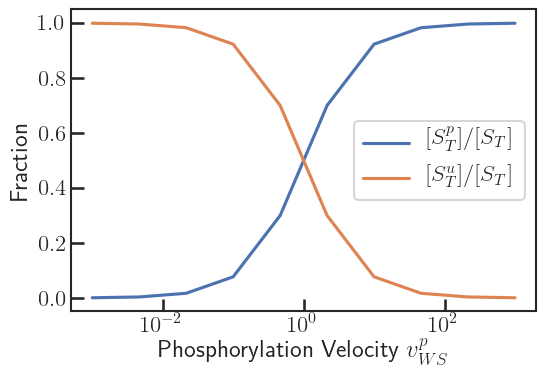

In [132]:
sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':True})


fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.plot(vWSp_list, (x[:, 3]+x[:, 5])/ST, label="$[S^p_T]/[S_T]$")
ax.plot(vWSp_list, (x[:, 2]+x[:, 4])/ST, label="$[S^u_T]/[S_T]$")


ax.set_xscale('log')

ax.set_ylabel("Fraction")
ax.set_xlabel("Phosphorylation Velocity $v_{WS}^p$")


ax.legend()

plt.show()

## Full Push-Pull Model

In [186]:

cons_mat = np.array([[1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                    [0, 0, 1, 0, 0, 1, 0, 1, -1, 0],
                    [0, 0, 0, 1, 1, 0, 1, 0, 0, -1]])

def full_push_pull(x, args):
    (WT, ET, ST, vWS, vES, vWSp, vESu, vSp) = args
    
    (W, E, Su, Sp, WSp, WSu, ESp, ESu, SuT, SpT) = x
        
    res = np.zeros_like(x)
    
    
    pWSu = vWS*W / (1 + vWS*W + vES*E)
    pESp = vES*E / (1 + vWS*W + vES*E)
    
    res[0] = SpT/ST - (vWSp*pWSu + vSp) / (vWSp*pWSu + vESu*pESp + vSp + 1)
    res[1] = W/WT - 1/(1+vWS*(Su+Sp))
    res[2] = E/ET - 1/(1+vES*(Su+Sp))
    res[3] = Su/SuT - 1/(1+vWS*W+vES*E)
    res[4] = Sp/SpT - 1/(1+vWS*W+vES*E)
    res[5] = WT - W - WSp - WSu
    res[6] = ET - E - ESp - ESu
    res[7] = ST - SuT - SpT
    res[8] = SuT - Su - WSu
    res[9] = SpT - Sp - ESp
    
    
#     print(res)
            
    return res


In [177]:

WT = 10
ET = 10
ST = 10
vWS = 1.0
vES = 1.0
vESu = 1.0
vSp = 0.1


W0 = 6.0
E0 = 6.0
Su0 = 1.0
Sp0 = 1.0
WSp0 = 1.0
WSu0 = 3.0
ESp0 = 3.0
ESu0 = 1.0
SuT0 = 5.0
SpT0 = 5.0

N = 10

x0 = (W0, E0, Su0, Sp0, WSp0, WSu0, ESp0, ESu0, SuT0, SpT0)

x = np.zeros([N, len(x0)])

vWSp_list = np.logspace(-3, 3, N)
for i, vWSp in enumerate(vWSp_list):
    
    args = ((WT, ET, ST, vWS, vES, vWSp, vESu, vSp),)
    
    result = opt.root(full_push_pull, x0, args=args, method='lm')
    
    x[i] = result.x
    
#     print(result)
    
#     break
    


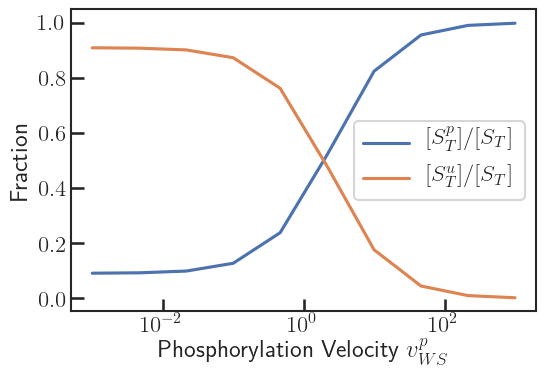

In [178]:
sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':True})


fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.plot(vWSp_list, (x[:, 9])/ST, label="$[S^p_T]/[S_T]$")
ax.plot(vWSp_list, (x[:, 8])/ST, label="$[S^u_T]/[S_T]$")


ax.set_xscale('log')

ax.set_ylabel("Fraction")
ax.set_xlabel("Phosphorylation Velocity $v_{WS}^p$")


ax.legend()

plt.show()

In [204]:

WT = 10
ST = 10
vWS = 1.0
vES = 1.0
vESu = 0.0
vWSp = 1.0
vSp = 0.1


N = 10


x = np.zeros([N, len(x0)])

ET_list = np.logspace(-3, 3, N)
for i, ET in enumerate(ET_list):
    
    args = ((WT, ET, ST, vWS, vES, vWSp, vESu, vSp),)
    
    
    SuT0 = ST / 2
    SpT0 = ST / 2
    Su0 = SuT0
    Sp0 = SpT0
    W0 = WT
    E0 = ET
    
    WSp0 = 0.0
    WSu0 = 0.0
    ESp0 = 0.0
    ESu0 = 0.0
    
    
    x0 = (W0, E0, Su0, Sp0, WSp0, WSu0, ESp0, ESu0, SuT0, SpT0)
    
    result = opt.root(full_push_pull, x0, args=args, method='lm')
    
    x[i] = result.x
    
    if not result.success:
        print("Failure:", i, ET)
        print(result)
        
        break
        


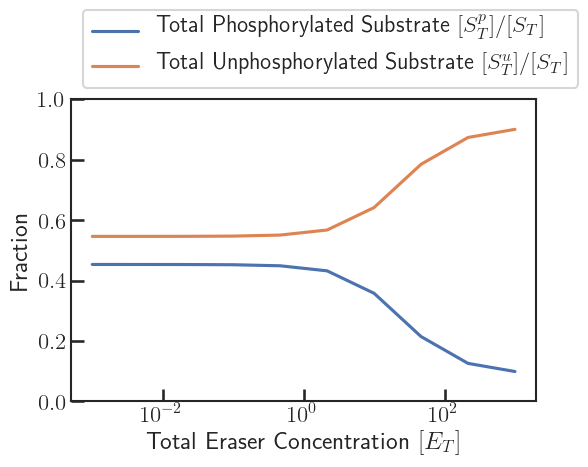

In [205]:
sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':True})


fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.plot(ET_list, (x[:, 9])/ST, label="Total Phosphorylated Substrate $[S^p_T]/[S_T]$")
ax.plot(ET_list, (x[:, 8])/ST, label="Total Unphosphorylated Substrate $[S^u_T]/[S_T]$")


ax.set_xscale('log')

ax.set_ylabel("Fraction")
ax.set_xlabel("Total Eraser Concentration $[E_T]$")


ax.set_ylim(0, 1)

ax.legend(bbox_to_anchor=(0, 1), loc='lower left')

plt.show()